In [55]:
## Import necessary modules
import pygmt
import pandas as pd
#pd.set_option('display.max_rows', None)
#matplotlib inline

#import pyproj
import pymap3d as pm

## gmt configurations
## character encodeing for octal code symbols
pygmt.config(PS_CHAR_ENCODING="Standard+")

In [31]:
## READ DATA
## Set input data file
## Format input file code X Y Z
sta_grc = pd.read_csv("data/grc_allsta.cts", sep=" ", comment="#")
sta_tur = pd.read_csv("data/tur_allsta.cts", sep=" ", comment="#")
sta_grc['vzero']=0
sta_tur['vzero']=0

In [32]:
## Convert to lat lon alt
sta_grc['Lat'], sta_grc['Lon'], sta_grc['Alt'] = pm.ecef2geodetic(sta_grc['X'], sta_grc['Y'], sta_grc['Z'], ell=pm.Ellipsoid.from_name('grs80'), deg=True)
sta_tur['Lat'], sta_tur['Lon'], sta_tur['Alt'] = pm.ecef2geodetic(sta_tur['X'], sta_tur['Y'], sta_tur['Z'], ell=pm.Ellipsoid.from_name('grs80'), deg=True)


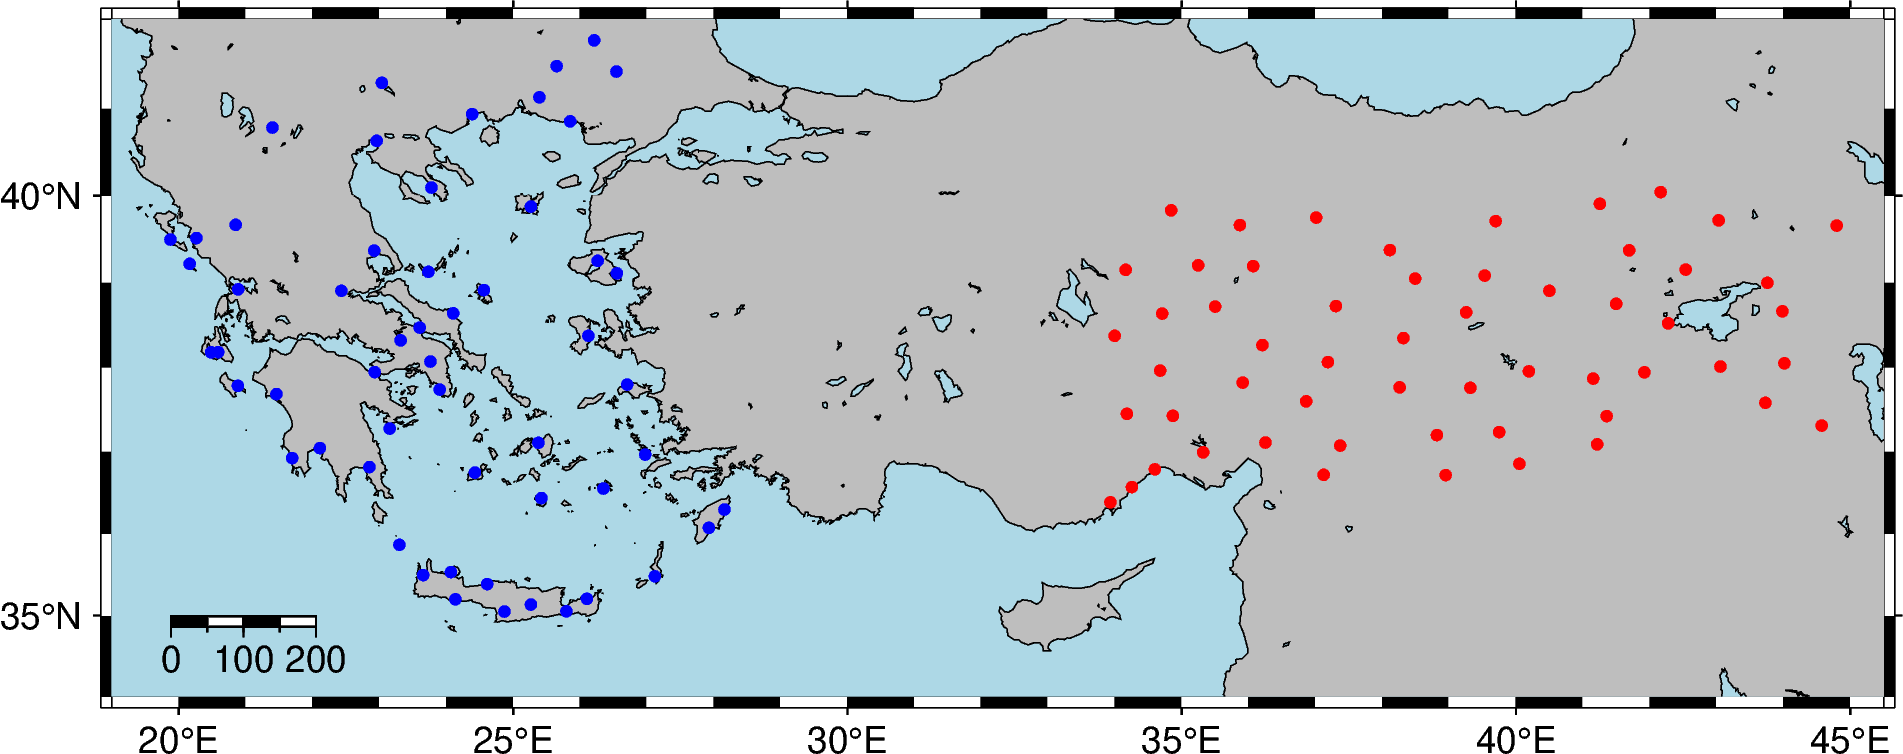

In [59]:
## plot only sites
fig = pygmt.Figure()
fig.basemap(region=[19, 45.5, 34, 42], projection="M15c", frame=True)
fig.coast(
    shorelines=True,
    land="grey",
    water="lightblue",
    map_scale="jBL+w200k+o0.5c/0.5c+f"
)

fig.plot(x=sta_grc.Lon, y=sta_grc.Lat, style="c0.1c", fill="blue")
fig.plot(x=sta_tur.Lon, y=sta_tur.Lat, style="c0.1c", fill="red")


#fig.text(textfiles='data/labels', angle=True, font=True, justify=True)

fig.show()

fig.savefig("plots/allstations.png")

In [44]:
## add font to plot label on DataFrame
sta_grc['font']='7p,Helvetica,brown'
sta_grc['tpos']="BR"
grtext_dict={
    'Long': sta_grc['Lon']-0.05,
    'Lat': sta_grc['Lat']+0.05,
    'angle': sta_grc['vzero'],
    'font': sta_grc['font'],
    'tpos': sta_grc['tpos'],
    'Code': sta_grc['code']
}

#vtext_items = vtext_dict.items()
#vtext_list = list(vtext_items)

grtext = pd.DataFrame(grtext_dict)
grtext.to_csv('grlabels', index=False, header=False, sep=' ')

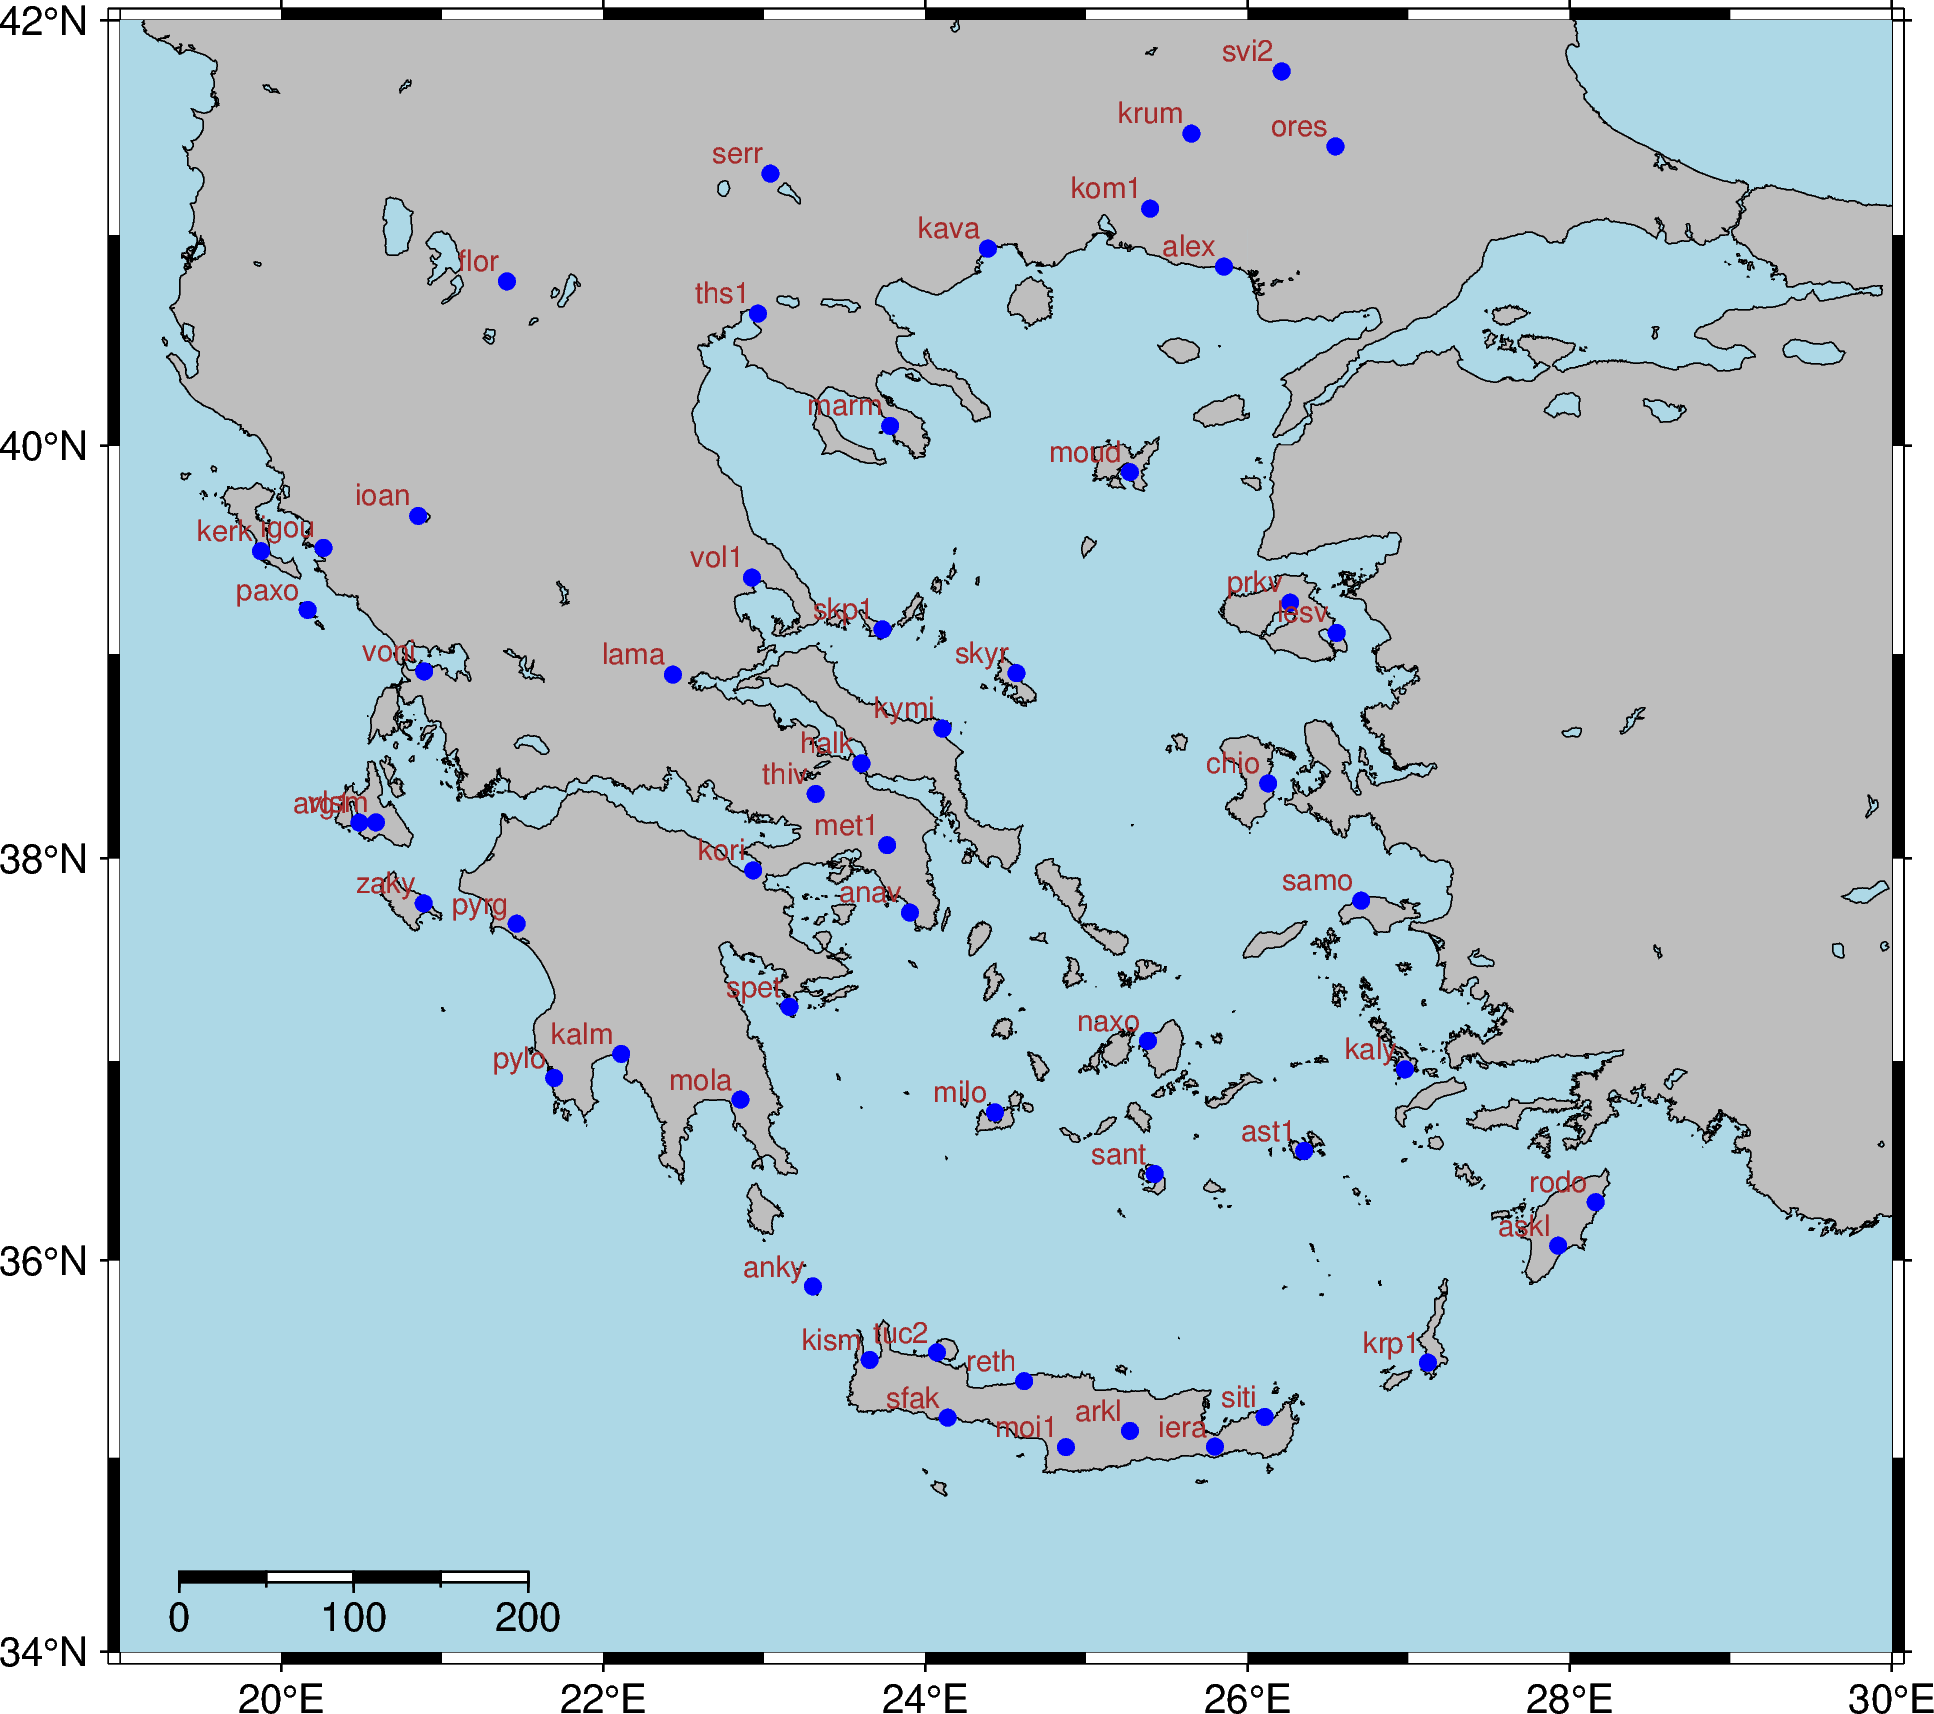

In [57]:
## plot only sites
fig = pygmt.Figure()
fig.basemap(region=[19, 30, 34, 42], projection="M15c", frame=True)
fig.coast(
    shorelines=True,
    land="grey",
    water="lightblue",
    map_scale="jBL+w200k+o0.5c/0.5c+f"
)

fig.plot(x=sta_grc.Lon, y=sta_grc.Lat, style="c0.15c", fill="blue")
#fig.plot(x=sta_tur.Lon, y=sta_tur.Lat, style="c0.15c", fill="red")


fig.text(textfiles='grlabels', angle=True, font=True, justify=True)

fig.show()

fig.savefig("plots/grstations.png")

In [46]:
## add font to plot label on DataFrame
sta_tur['font']='7p,Helvetica,brown'
sta_tur['tpos']="BR"
trtext_dict={
    'Long': sta_tur['Lon']-0.05,
    'Lat': sta_tur['Lat']+0.05,
    'angle': sta_tur['vzero'],
    'font': sta_tur['font'],
    'tpos': sta_tur['tpos'],
    'Code': sta_tur['code']
}

#vtext_items = vtext_dict.items()
#vtext_list = list(vtext_items)

trtext = pd.DataFrame(trtext_dict)
trtext.to_csv('trlabels', index=False, header=False, sep=' ')

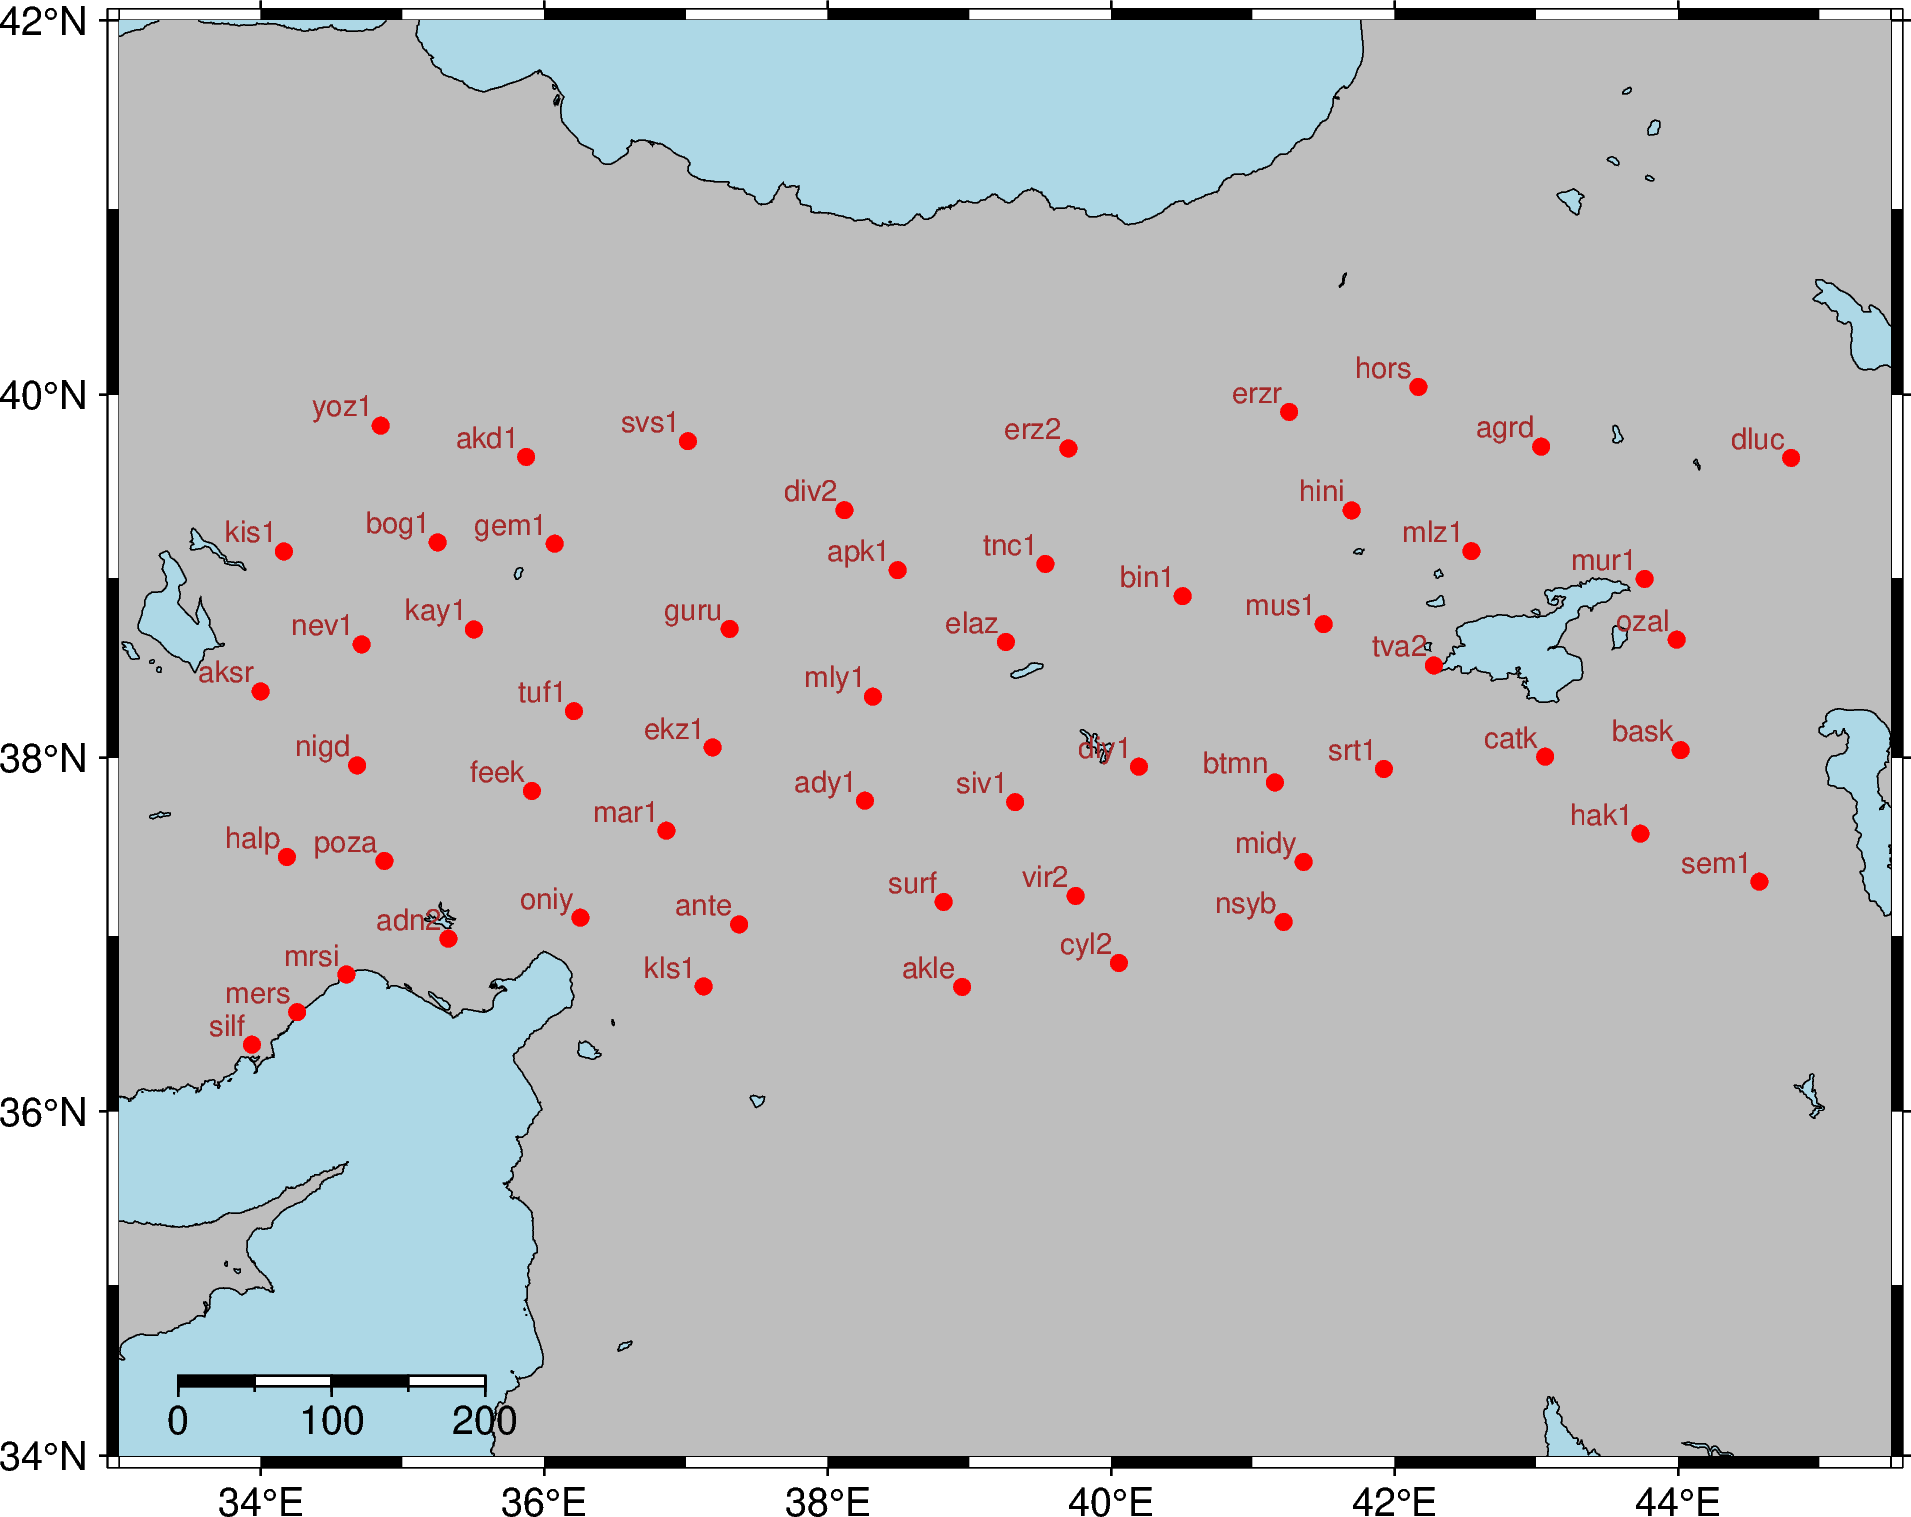

In [58]:
## plot only sites
fig = pygmt.Figure()
fig.basemap(region=[33, 45.5, 34, 42], projection="M15c", frame=True)
fig.coast(
    shorelines=True,
    land="grey",
    water="lightblue",
    map_scale="jBL+w200k+o0.5c/0.5c+f"
)

#fig.plot(x=sta_grc.Lon, y=sta_grc.Lat, style="c0.15c", fill="blue")
fig.plot(x=sta_tur.Lon, y=sta_tur.Lat, style="c0.15c", fill="red")


fig.text(textfiles='trlabels', angle=True, font=True, justify=True)

fig.show()

fig.savefig("plots/trstations.png")

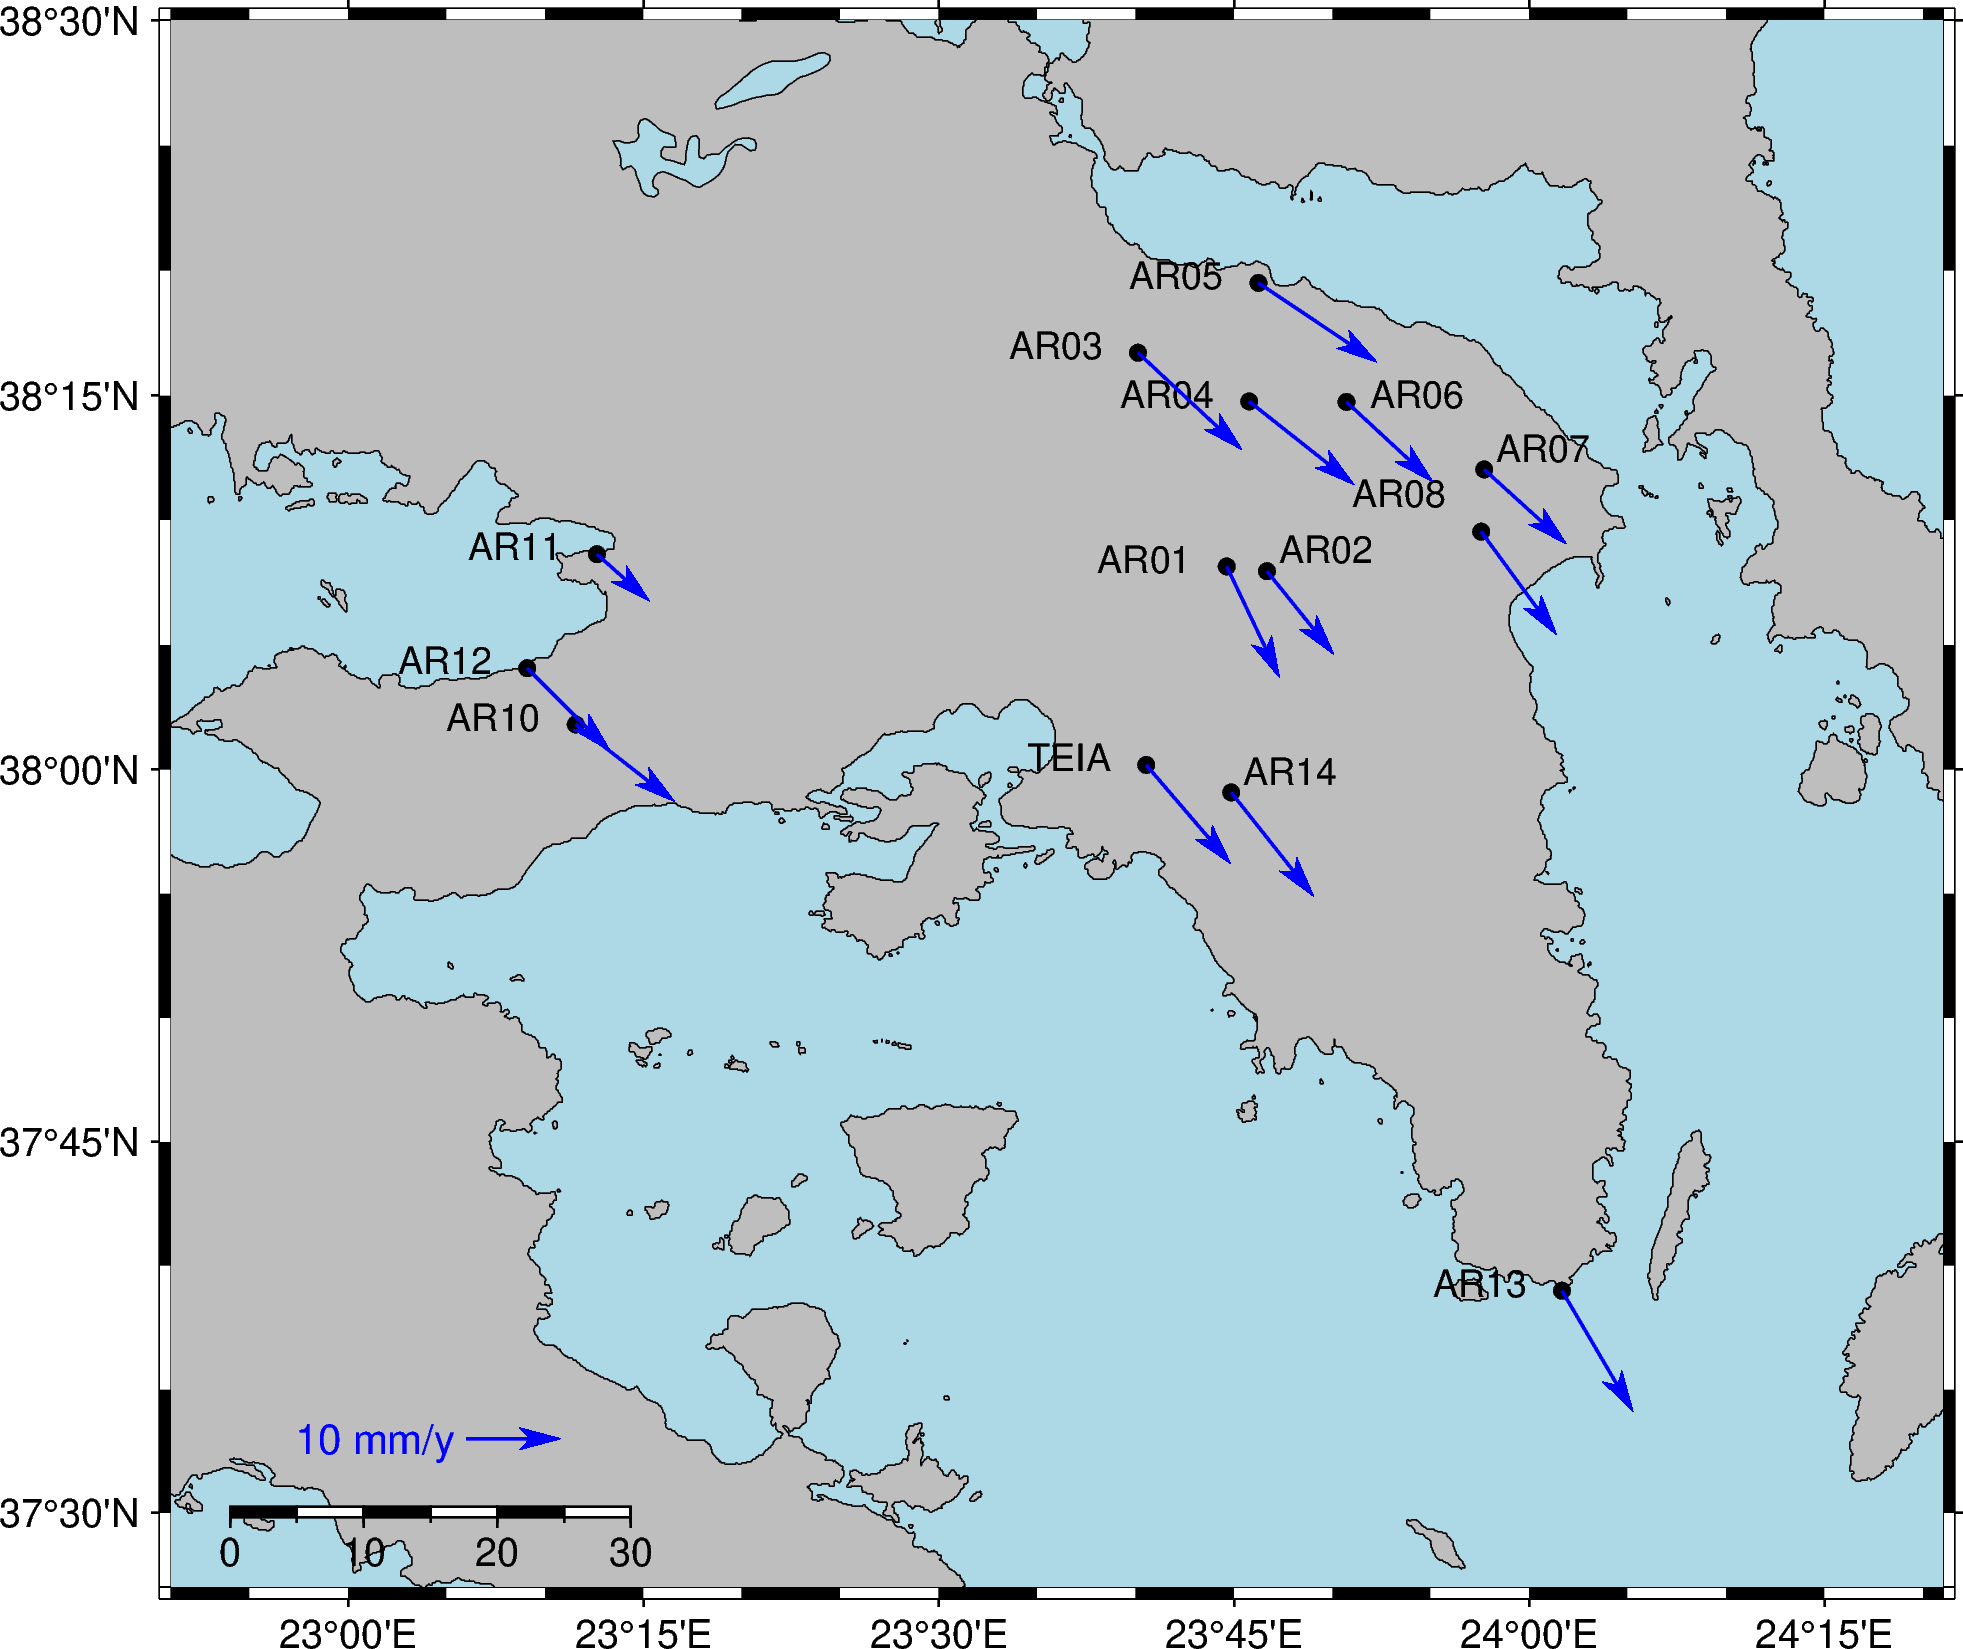

In [49]:
## Plot Horizontal velocities for each cite
fig = pygmt.Figure()
fig.basemap(region=[22.85, 24.35, 37.45, 38.5], projection="M15c", frame=True)
fig.coast(
    shorelines=True,
    land="grey",
    water="lightblue",
    map_scale="jBL+w30k+o0.5c/0.5c+f"
)
#pygmt.makecpt(cmap="globe", series=[-6000, 3000])
#fig.grdimage(grid='./earth_relief_15s.grd', projection="M15c", region=[22.85, 24.35, 37.45, 38.5], frame="a")
#fig.grdimage(grid="earth_relief_15s.grd", C=r, region=[23, 24.5, 37.5, 38.5],  E=100)
# store focal mechanisms parameters in a dict
# focal_mechanism = dict(strike=330, dip=30, rake=90, magnitude=3)

# pass the focal mechanism data to meca in addition to the scale and event
# location
# fig.meca(focal_mechanism, scale="1c", longitude=23.5, latitude=36, depth=12.0)

fig.plot(x=hvel.Long, y=hvel.Lat, style="c0.15c", color="black")

fig.text(textfiles='data/labels', angle=True, font=True, justify=True)

fig.velo(
    data=hvel,
    pen="0.7p,blue",
    uncertaintycolor  ="lightblue1",
    line=True,
    spec="e0.08/0.39/0",
    frame=["WSne"],
    vector="0.35c+e+gblue",
)

fig.velo(
    data=vsc,
    pen="0.7p,blue",
    uncertaintycolor  ="lightblue1",
    line=True,
    spec="e0.08/0.39/10",
    frame=["WSne"],
    vector="0.35c+e+gblue",
)
#vtext.to_csv(r'output.txt', header=None, index=None, sep=' ', mode='a')



fig.show()

In [50]:
fig.savefig("plots/fin_vhor_SXETIKOS_ITRF14.png")

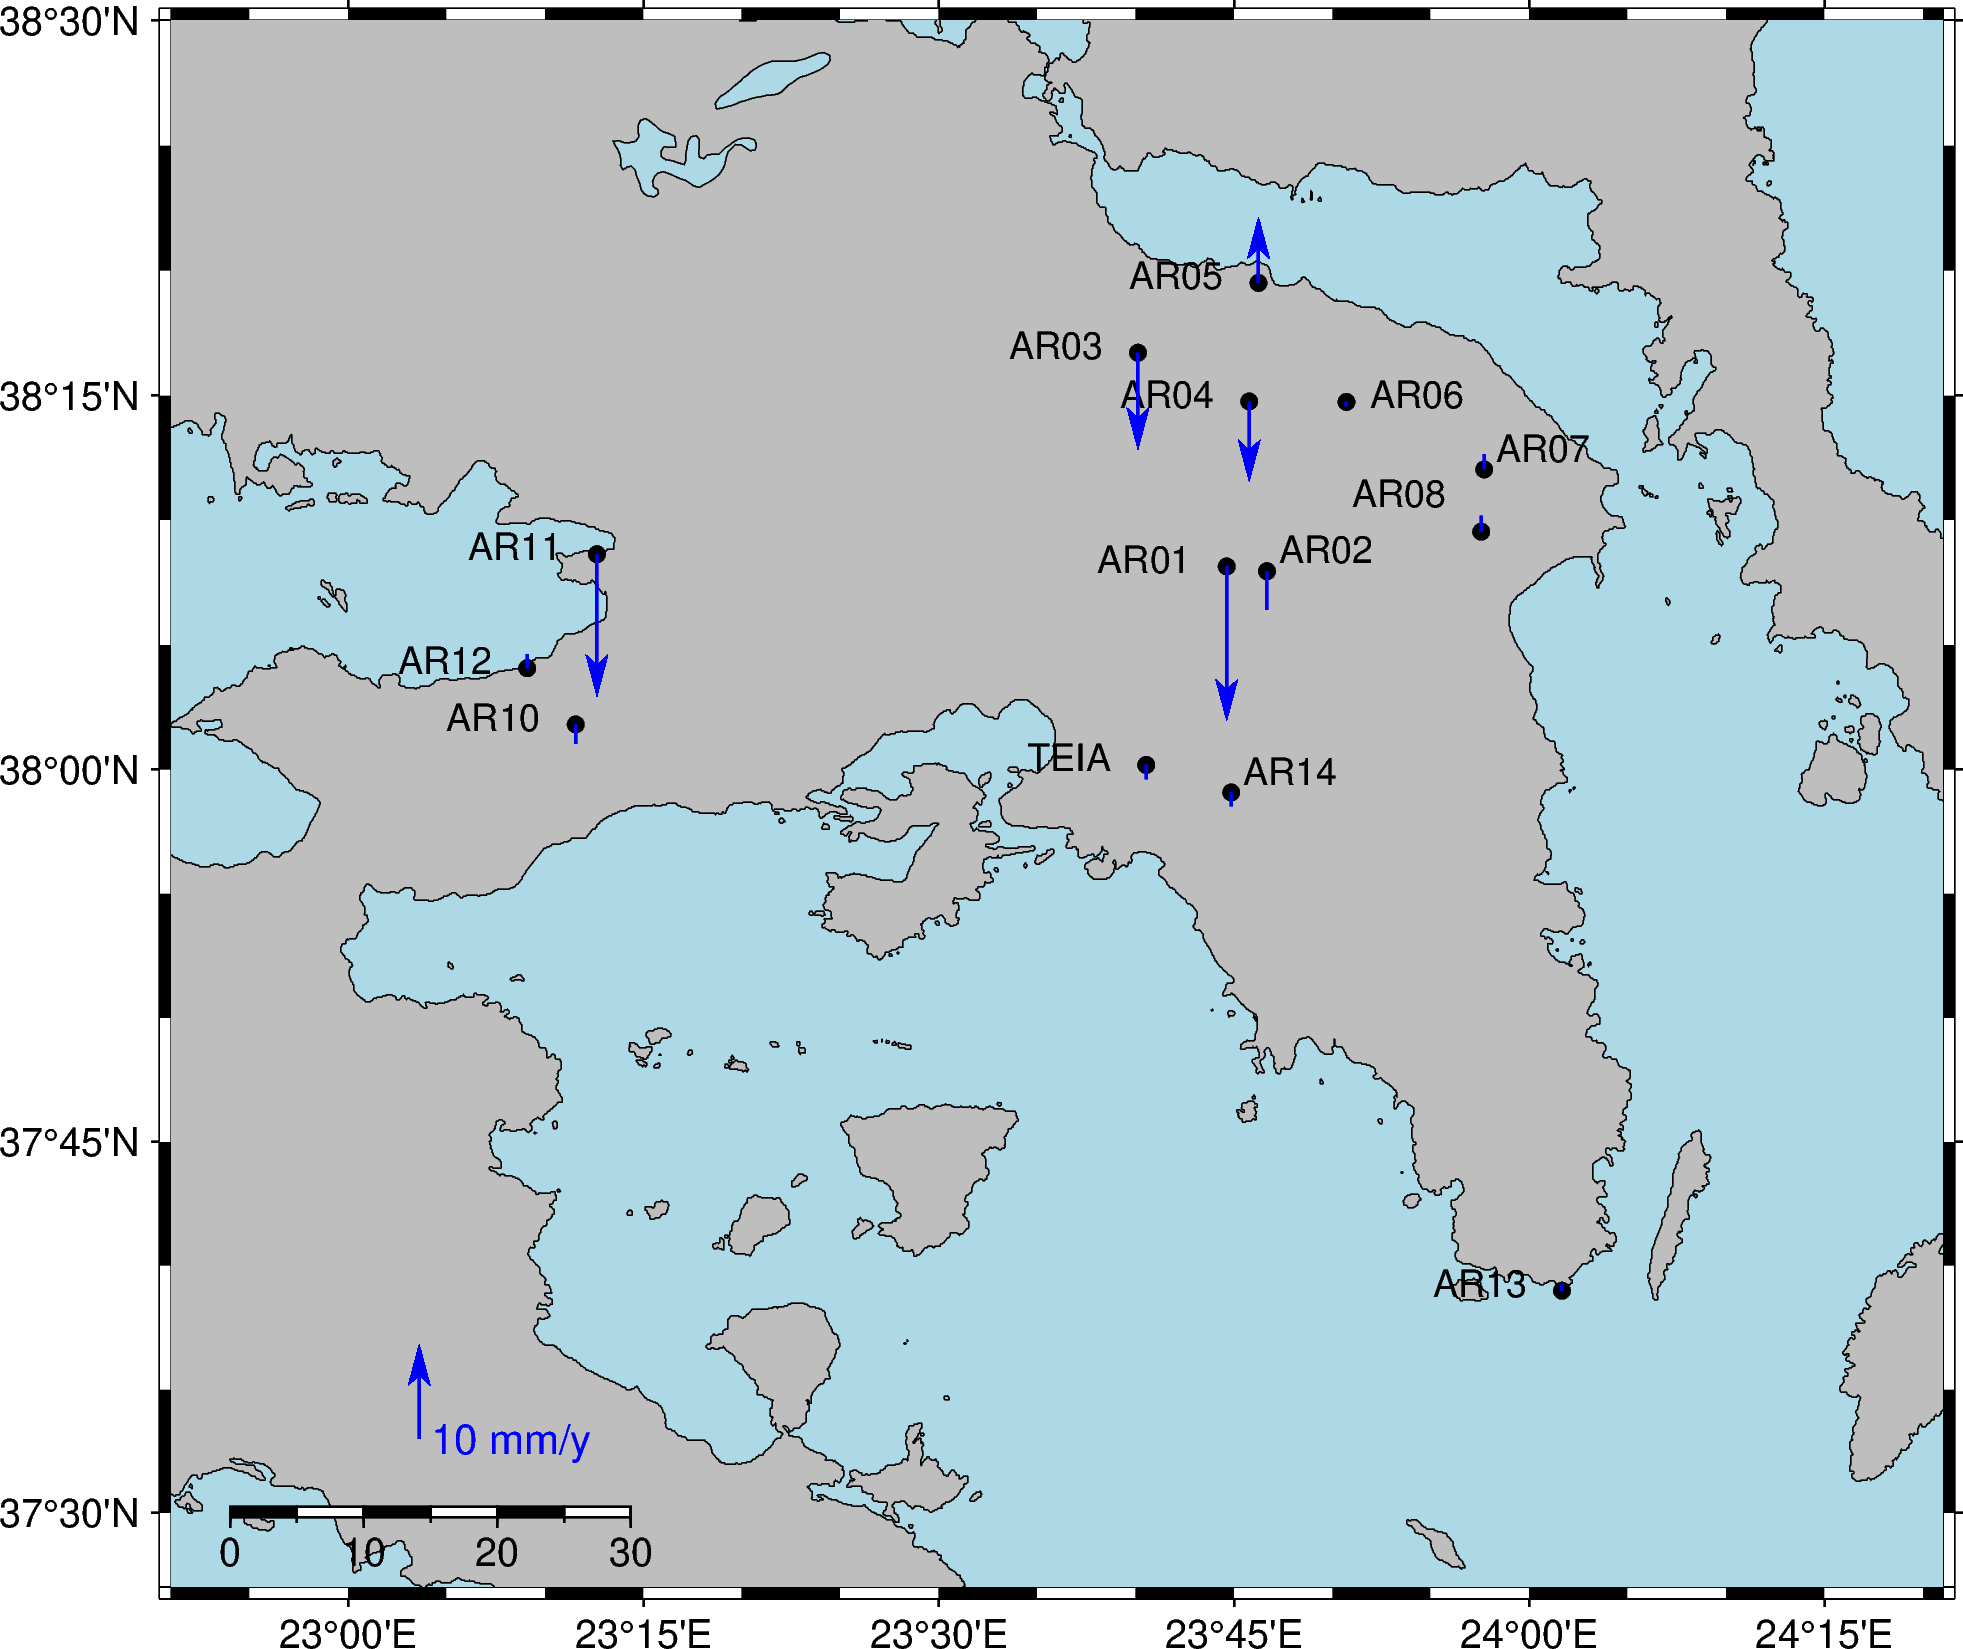

In [51]:
## Plot vertical velocities for each cite
fig = pygmt.Figure()
fig.basemap(region=[22.85, 24.35, 37.45, 38.5], projection="M15c", frame=True)
fig.coast(
    shorelines=True,
    land="grey",
    water="lightblue",
    map_scale="jBL+w30k+o0.5c/0.5c+f"
)


#fig.plot(x=vel.Long, y=vel.Lat, style="c0.15c", color="black")
fig.plot(x=hvel.Long, y=hvel.Lat, style="c0.15c", color="black")

fig.text(textfiles='data/labels', angle=True, font=True, justify=True)

fig.velo(
    data=vvel,
    pen="0.7p,blue",
    uncertaintycolor  ="lightblue1",
    line=True,
    spec="e0.1/0.39/0",
    frame=["WSne"],
    vector="0.35c+e+gblue",
)

## create scale dataframe for vector magnitude
vscv={
    'Long': [23.06],
    'Lat': [37.55],
    'Ve': [0],
    'Vn': [10],
    'sVe': [0],
    'sVn': [0],
    'sV': [0],
    'Code': ['10 mm/y']
}
fig.velo(
    data=vscv,
    pen="0.7p,blue",
    uncertaintycolor  ="lightblue1",
    line=True,
    spec="e0.08/0.39/10",
    frame=["WSne"],
    vector="0.35c+e+gblue",
)

fig.show()

In [52]:
fig.savefig("plots/fin_vver_SXETIKOS_ITRF2014.png")